Using Finta for Trading Signals 

In [23]:
import ETFFundamentalData as finData
import ETFHistoryDownload as hist
import sqlalchemy as sql
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
eft_data_connection_string2 = 'sqlite:///./Resources/etf.db'
# Database engine
etf_data_engine2 = sql.create_engine(eft_data_connection_string2, echo=True)
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)
# Import the finta Python library and the TA module
from finta import TA

In [24]:
sql_query = """
SELECT * from FINANCIAL_DATA where Sector != 'None'
"""
data_df = pd.read_sql_query(sql_query, eft_data_connection_string2)
data_df

,index,Symbol,Sector,Name,Date_MostRecentQuarter,Date_LastDividend,Date_LastFiscalYearEnd,Date_NextFiscalYearEnd,Beta,BookValue,Debt_to_Equity,Divedend_Rate,Dividend_5yrAvg,Dividend_LastValue,Dividend_Rate_TrailngAnnual,Dividend_TrailingAnnual,Dividend_Yield,Earning_Growth,Earning_QuarterGrowth,EBITDA,Enterprise_EBITDA,Enterprise_Revenue,Enterprise_Value,EPS_Trailing,Margin_EBITDA,Margin_Gross,Margin_Operation,Margin_Profit,MarketCap,Name_Long,PE_FWD,PE_Trailing,PEG_FWD,PEG_Trailing,Price_to_Book,PS_12m,PX_200dAvg,PX_2weeksHigh,PX_2weeksLow,Rating_MorningStar,Rating_RecommendMean,Ratio_Current,Ratio_DivPayout,Ratio_Short,Return_on_Asset,Return_on_Equity,Revenue_per_share,TargetPX_High,TargetPX_low,TargetPX_Mean,TargetPX_Median,Total_Cash,Total_Cash_per_Share,Total_Debt,Total_Revenue,Volume_10dAvg
0,A,A,Healthcare,"Agilent Technologies, Inc.",2021-10-31 00:00:00,2021-10-04 00:00:00,2021-10-31 00:00:00,2023-10-31 00:00:00,0.998441,17.832,54.017,0.84,0.77,0.194,0.776,0.004823471,0.0053,1.035,0.991,1.729000e+09,28.658,7.841,49550426112,3.94,0.27362,0.53917,0.22282,0.19148001,4.821446e+10,"Agilent Technologies, Inc.",33.968086,40.520300,2.99,2.1606,8.953005,7.630077,150.144400,179.57,112.47,None,None,2.224,0.19700001,2.29,0.08656,0.235820,20.786,None,None,None,None,1575000064,5.215,2911000064,6319000064,1410710
1,AAON,AAON,Industrials,"AAON, Inc.",2021-09-30 00:00:00,2021-11-24 00:00:00,2020-12-31 00:00:00,2022-12-31 00:00:00,0.563636,7.636,None,0.38,0.67,0.19,0.38,0.004799798,0.0048,-0.237,-0.238,1.128370e+08,36.004,7.889,4062545408,1.33,0.21913,0.28199,0.16243,0.13878,4.164356e+09,"AAON, Inc.",47,59.721800,5.24,NaN,10.402042,8.087149,68.829200,83.79,59.22,None,3,3.647,0.2857,4.42,0.10933,0.191800,9.84,72,70,71,71,101813000,1.942,0,514935008,216300
2,AAPL,AAPL,Technology,Apple Inc.,2021-09-25 00:00:00,2021-11-05 00:00:00,2021-09-25 00:00:00,2023-09-25 00:00:00,1.203116,3.841,216.392,0.88,1.17,0.22,0.85,0.004769922,0.0050,0.662,0.622,1.202330e+11,24.845,8.166,2987166793728,5.61,0.32867,0.41779,0.29782,0.25882,2.913285e+12,Apple Inc.,28.733011,31.652407,1.99,3.8515,46.23015,7.963776,143.953640,182.13,116.21,None,1.8,1.075,0.1515,1,0.20179,1.474430,21.904,210,128.01,175.76,175,62639001600,3.818,136521998336,365817004032,89482090
3,AAT,AAT,Real Estate,"American Assets Trust, Inc.",2021-09-30 00:00:00,2021-12-08 00:00:00,2020-12-31 00:00:00,2022-12-31 00:00:00,1.231168,20.589,137.857,1.2,2.95,0.3,1.11,0.0296,0.0320,0.99,0.993,2.002870e+08,18.730,10.629,3751301632,0.386,0.56751996,0.65979,0.25663,0.065560006,2.269518e+09,"American Assets Trust, Inc.",46.9125,97.227974,31.89,NaN,1.8228179,6.430741,36.873900,40.83,27.21,None,2.6,3.014,2.8462,2.81,0.01920,0.024070,5.884,44,34.5,39.3,40,171923008,2.843,1680056064,352916992,374480
4,ABBV,ABBV,Healthcare,AbbVie Inc.,2021-09-30 00:00:00,2021-10-14 00:00:00,2020-12-31 00:00:00,2022-12-31 00:00:00,0.788051,7.665,594.66,5.64,4.28,1.3,5.2,0.038254984,0.0417,0.38,0.377,2.885500e+10,10.670,5.581,307886030848,4.196,0.52303004,0.70193,0.36702,0.13656001,2.393709e+11,AbbVie Inc.,9.692197,32.268826,2.38,NaN,17.66471,4.338867,114.585600,136.83,101.81,None,2,1.015,1.2271,2.53,0.08480,0.522550,31.187,172,105,133.61,132,12248999936,6.929,80737001472,55168999424,6317640
5,ABCB,ABCB,Financial Services,Ameris Bancorp,2021-09-30 00:00:00,2021-12-30 00:00:00,2020-12-31 00:00:00,2022-12-31 00:00:00,1.297142,41.812,None,0.6,1.2,0.15,0.6,0.012070007,0.0121,-0.299,-0.297,NaN,NaN,0.215,224825440,5.58,0,0,0.48191,0.37208,3.459477e+09,Ameris Bancorp,10.918681,8.903226,1.14,NaN,1.1881757,3.306859,51.438900,59.85,36.6,None,2.1,NaN,0.1075,5.81,0.01836,0.142440,15.073,63,56,60.29,61,3777502976,54.449,555707008,1046152000,480470
6,ABG,ABG,Consumer Cyclical,Asbury Automotive Group Inc,2021-09-30 00:00:00,2008-07-30 00:00:00,2020-12-31 00:00:00,2022-12-31 00:00:00,1.535064,67.283,143.433,None,None,0.225,None,None,NaN,0.52,0.528,7.269000e+08,6.709,0.518,4876619776,24.736,0.07719,0.18395,0.07293,0.05108,3.996229e+09,"Asbury Aut

In [25]:
#read price History

sql_query = """
SELECT date, close, volume
FROM STOCK_HISTORY where symbol = 'AMZN' and date > '2020-02-05'
"""
#sql_query = """
#SELECT date, close
#FROM STOCK_HISTORY where symbol = 'AMZN'
#"""
price_df = pd.read_sql_query(sql_query, eft_data_connection_string2)
price_df = price_df.sort_values(by=['date'])
price_df['date'] = pd.to_datetime(price_df['date'], format='%Y-%m-%d')
price_df = price_df.set_index('date')
#price_df['close'] = price_df['close'].rolling(30).mean()
price_df = price_df.dropna()
display(price_df.head())
display(price_df.tail())
display(price_df.index.min())
signals_df= price_df.copy()

,close,volume
date,,
2020-02-06,2050.37,2827062
2020-02-07,2079.21,4794674
2020-02-10,2134.55,4671496
2020-02-11,2152.27,5584290
2020-02-12,2161.34,3101082


,close,volume
date,,
2022-01-04,3349.75,3008036
2022-01-05,3288.00,2795994
2022-01-06,3264.32,2154386
2022-01-07,3251.71,2049978
2022-01-10,3229.62,3864898


Timestamp('2020-02-06 00:00:00')

In [26]:
price_df["actual_returns"] = price_df["close"].pct_change()

In [27]:
price_df = price_df.dropna()

In [28]:
short_window = 4
price_df['sma_fast'] = TA.SMA(price_df, 4)
# Create a simple moving average (SMA) using a window size of 100. 
# Assign this to a column called `sma_slow`
long_window = 100
price_df['sma_slow'] = price_df['close'].rolling(window=long_window).mean()
# Create additional technical indicators
#price_df["ssma"] = TA.SSMA(price_df)
price_df["ema"] = TA.EMA(price_df, 50)
price_df["dema"] = TA.DEMA(price_df)
price_df["tema"] = TA.TEMA(price_df)
price_df["trima"] = TA.TRIMA(price_df)
price_df = price_df.dropna()
display(price_df.head())
display(price_df.tail())
display(price_df.index.min())

,close,volume,actual_returns,sma_fast,sma_slow,ema,dema,tema,trima
date,,,,,,,,,
2020-06-30,2756.09,3188724,0.027809,2721.6600,2245.099975,2497.576262,2746.679566,2738.990903,2530.932747
2020-07-01,2879.20,6112148,0.044668,2752.4200,2253.099875,2512.809826,2801.627672,2810.991207,2543.939861
2020-07-02,2887.56,6173373,0.002904,2801.0925,2260.629975,2527.758519,2842.906953,2859.328390,2557.562608
2020-07-06,3057.16,6493685,0.058735,2895.0025,2269.678875,2548.861988,2932.167815,2970.303401,2571.853719
2020-07-07,3000.12,4875944,-0.018658,2956.0100,2278.066675,2566.838800,2973.760053,3009.540512,2586.438565


,close,volume,actual_returns,sma_fast,sma_slow,ema,dema,tema,trima
date,,,,,,,,,
2022-01-04,3349.75,3008036,-0.016971,3366.2375,3406.594297,3427.505903,3362.962250,3363.512844,3455.956790
2022-01-05,3288.00,2795994,-0.018434,3345.0125,3406.534697,3422.035083,3332.905600,3324.364956,3448.094568
2022-01-06,3264.32,2154386,-0.007202,3327.4125,3406.187897,3415.850178,3303.348320,3288.710141,3439.985525
2022-01-07,3251.71,2049978,-0.003863,3288.4450,3406.285397,3409.413308,3278.330928,3261.296199,3431.907253
2022-01-10,3229.62,3864898,-0.006793,3258.4125,3406.569497,3402.362590,3253.302560,3234.938265,3423.874660


Timestamp('2020-06-30 00:00:00')

In [29]:
# Assign a copy of the technical variable columns to a new DataFrame called `X` and lag it.
X = price_df[['sma_fast', 'sma_slow', 'ema', 'dema', 'tema', 'trima']].shift().dropna().copy()
price_df['signal'] = 0.0

# Generate signal to buy stock long
price_df.loc[(price_df['actual_returns'] >= 0), 'signal'] = 1
# Generate signal to sell stock short
price_df.loc[(price_df['actual_returns'] < 0), 'signal'] = -1
price_df.tail(3)
# Copy the new "signal" column to a new Series called `y`.
y = price_df['signal']
display(X.head(1))
display(y.head(2))

,sma_fast,sma_slow,ema,dema,tema,trima
date,,,,,,
2020-07-01,2721.66,2245.099975,2497.576262,2746.679566,2738.990903,2530.932747


date
2020-06-30    1.0
2020-07-01    1.0
Name: signal, dtype: float64

## Split the Data into Training and Test Datasets

In [30]:
# Import the neccessary Date function
from pandas.tseries.offsets import DateOffset

# Use the following code to select the start of the training period: `training_begin = X.index.min()`
training_begin = X.index.min()
print(training_begin)

# Use the following code to select the ending period for the training data: `training_end = X.index.min() + DateOffset(months=3)`
training_end = X.index.min() + DateOffset(months=6)
print(training_end)

# Generate the X_train and y_train DataFrames using loc to select the rows from `training_begin` up to `training_end`
# Hint: Use `loc[training_begin:training_end]` for X_train and y_train
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Generate the X_test and y_test DataFrames using loc to select from `training_end` to the last row in the DataFrame.
# Hint: Use `loc[training_end:]` for X_test and y_test
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Use StandardScaler to scale the X_train and X_test data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

from imblearn.over_sampling import RandomOverSampler
# Use RandomOverSampler to resample the datase using random_state=1
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

2020-07-01 00:00:00
2021-01-01 00:00:00


## Train and Generate Trade Predictions

In [31]:
# Create the classifier model.
from sklearn.svm import SVC
model = SVC()
 
# Fit the model to the data using X_train_scaled and y_train
model = model.fit(X_resampled, y_resampled)

# Use the trained model to predict the trading signals for the training data.
training_signal_predictions = model.predict(X_resampled)

# Evaluate the model using a classification report
from sklearn.metrics import classification_report
training_report = classification_report(y_resampled, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.60      0.78      0.68        67
         1.0       0.68      0.48      0.56        67

    accuracy                           0.63       134
   macro avg       0.64      0.63      0.62       134
weighted avg       0.64      0.63      0.62       134



## New Code: Backtest the Trading Algorithm

In [32]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = model.predict(X_test_scaled)

In [33]:
# Evaluate the model's ability to predict the trading signal for the testing data using a classification report
training_report = classification_report(y_test, testing_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.86      0.64       128
         1.0       0.55      0.17      0.26       130

    accuracy                           0.51       258
   macro avg       0.53      0.51      0.45       258
weighted avg       0.53      0.51      0.45       258



In [34]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['predicted_returns'] = testing_signal_predictions
predictions_df['predicted_returns'].value_counts()
predictions_df["Entry/Exit"] = predictions_df["predicted_returns"].diff()

In [35]:
 testing_signal_predictions

array([-1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [36]:
# Add in actual returns and calculate trading returns
predictions_df['actual_returns'] = price_df['actual_returns']
predictions_df['trading_algorithm_returns'] = predictions_df['actual_returns'] * predictions_df['predicted_returns']
predictions_df

,predicted_returns,Entry/Exit,actual_returns,trading_algorithm_returns
date,,,,
2021-01-04,-1.0,NaN,-0.021422,0.021422
2021-01-05,-1.0,0.0,0.009998,-0.009998
2021-01-06,-1.0,0.0,-0.025012,0.025012
2021-01-07,-1.0,0.0,0.007457,-0.007457
2021-01-08,-1.0,0.0,0.006734,-0.006734
2021-01-11,-1.0,0.0,-0.021036,0.021036
2021-01-12,1.0,2.0,0.001646,0.001646
2021-01-13,1.0,0.0,0.014534,0.014534
2021-01-14,1.0,0.0,-0.011661,-0.011661


<AxesSubplot:xlabel='date'>

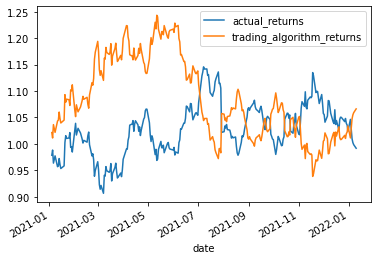

In [37]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[['actual_returns', 'trading_algorithm_returns']]).cumprod().plot()

Recreate the DMAC trading algorithm using technical indicators from the finta library.

In [38]:
# Create a signals_df DataFrame that is a copy of the ixn_df Dataframe
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
#signals_df = pd.DataFrame(index=signals_df.index)
signals_df['signal'] = 0.0

# Create short simple moving average over the short window
signals_df['short_mavg'] = signals_df['close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals_df['long_mavg'] = signals_df['close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals_df['signal'][short_window:] = np.where(signals_df['short_mavg'][short_window:] 
                                            > signals_df['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals_df['positions'] = signals_df['signal'].diff()

# Print `signals`
print(signals_df)

                close    volume  signal   short_mavg    long_mavg  positions
date                                                                        
2020-02-06  2050.3700   2827062     0.0  2050.370000  2050.370000        NaN
2020-02-07  2079.2100   4794674     0.0  2064.790000  2064.790000        0.0
2020-02-10  2134.5500   4671496     0.0  2088.043333  2088.043333        0.0
2020-02-11  2152.2700   5584290     0.0  2104.100000  2104.100000        0.0
2020-02-12  2161.3400   3101082     0.0  2115.548000  2115.548000        0.0
2020-02-13  2151.1200   2688038     0.0  2121.476667  2121.476667        0.0
2020-02-14  2135.4800   2362540     0.0  2123.477143  2123.477143        0.0
2020-02-18  2155.6700   2674865     0.0  2127.501250  2127.501250        0.0
2020-02-19  2170.2100   2261147     0.0  2132.246667  2132.246667        0.0
2020-02-20  2153.5900   2908965     0.0  2134.381000  2134.381000        0.0
2020-02-21  2095.9700   4363040     0.0  2130.889091  2130.889091        0.0

C:\programdata\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


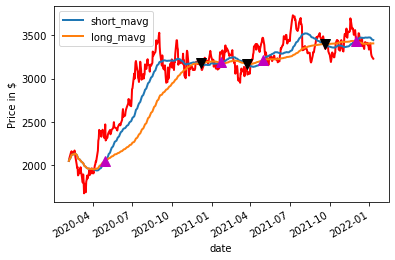

In [39]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
signals_df['close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals_df[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals_df.loc[signals_df.positions == 1.0].index, 
         signals_df.short_mavg[signals_df.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals_df.loc[signals_df.positions == -1.0].index, 
         signals_df.short_mavg[signals_df.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [40]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals_df.index).fillna(0.0)

# Buy a 100 shares
positions['position'] = 100*signals_df['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals_df['close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals_df['close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals_df['close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            position  holdings      cash     total  returns
date                                                       
2020-02-06       0.0       0.0  100000.0  100000.0      NaN
2020-02-07       0.0       0.0  100000.0  100000.0      0.0
2020-02-10       0.0       0.0  100000.0  100000.0      0.0
2020-02-11       0.0       0.0  100000.0  100000.0      0.0
2020-02-12       0.0       0.0  100000.0  100000.0      0.0


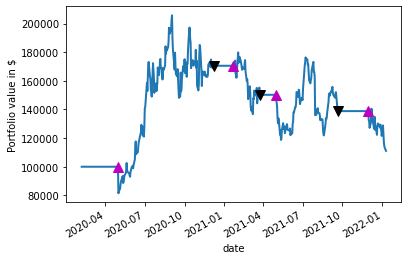

In [41]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals_df.positions == 1.0].index, 
         portfolio.total[signals_df.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals_df.positions == -1.0].index, 
         portfolio.total[signals_df.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [42]:
print(portfolio)

             position   holdings      cash      total   returns
date                                                           
2020-02-06       0.00       0.00  100000.0  100000.00       NaN
2020-02-07       0.00       0.00  100000.0  100000.00  0.000000
2020-02-10       0.00       0.00  100000.0  100000.00  0.000000
2020-02-11       0.00       0.00  100000.0  100000.00  0.000000
2020-02-12       0.00       0.00  100000.0  100000.00  0.000000
2020-02-13       0.00       0.00  100000.0  100000.00  0.000000
2020-02-14       0.00       0.00  100000.0  100000.00  0.000000
2020-02-18       0.00       0.00  100000.0  100000.00  0.000000
2020-02-19       0.00       0.00  100000.0  100000.00  0.000000
2020-02-20       0.00       0.00  100000.0  100000.00  0.000000
2020-02-21       0.00       0.00  100000.0  100000.00  0.000000
2020-02-24       0.00       0.00  100000.0  100000.00  0.000000
2020-02-25       0.00       0.00  100000.0  100000.00  0.000000
2020-02-26       0.00       0.00  100000